In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np

In [7]:
def initialize():
    files = sorted(glob.glob('*.csv'))
    data = {}
    names = []
    number_of_files = len(files)
    for i in range(number_of_files):
        name = files[i]
        name = name.replace('.csv','') #remove ".csv" from file names
        print(name)
        names.append(name)
        data[name] = pd.read_csv(files[i])        
    return data, names

def plot(data,data_name, name, xlabel = 'age[Month]', ylabel = 'weight[kg]', kid_datax = [[12,13]], kid_datay = [[42.5, 50]]):
    data_to_plot = data[data_name]
    columns = data_to_plot.columns
    labels = ['2%','5%','10%','25%','50%','75%','90%','95%','98%'] #label of each data column
    
    ax,fig = plt.subplots(1,figsize = (12,6))
    for i in range(1, len(columns)):
        x = data_to_plot[columns[0]]
        y = data_to_plot[columns[i]]
        lastx = x[len(x)-12+i] # x coordinate for printing labels
        lasty = y[len(y)-12+i]# y coordinate for printing labels
        plt.plot(x,y,'--', color = 'red')
        plt.text(lastx,lasty,labels[i-1],rotation=0)
    x = np.array(kid_datax[0])
    x = x.reshape(-1,1)
    y = np.array(kid_datay[0])
    y = y.reshape(-1,1) 
    plt.plot(x,y,'-*', color = 'blue')
    plt.title(name)
    plt.xlabel(columns[0])
    plt.ylabel(ylabel)
    plt.grid()
    plt.show()

def draw_plots(data,files, name, gender,age, length,weight,head, length_unit = 'cm', weight_unit = 'kg', head_unit = 'cm'):
    boy_data = [0,1,2,3]
    girl_data = [5,6,7,8]
    labels = [['age[Month]','head[cm]'],
              ['age[Month]','length[cm]'],
              ['age[Month]','weight[Kg]'],
              ['length[cm]','weight[Kg]']]
    
    if length_unit.lower() not in ['inch', 'cm']:
        print('length unit is not supported, try inch and cm')
        return
    else:
        length_ = length
        if length_unit.lower() == 'inch':
            print('changing inch to cm ...')
            length_ = [j*2.54 for j in length_]
    
    if head_unit.lower() not in ['inch', 'cm']:
        print('length unit is not supported, try inch and cm')
        return
    else:
        head_ = head
        if length_unit.lower() == 'inch':
            print('changing inch to cm ...')
            head_ = [j*2.54 for j in head_]
    
    if weight_unit.lower() not in ['kg', 'lb', 'pounds']:
        print('length unit is not supported, try kg,lb and pounds')
        return
    else:
        weight_ = weight
        if weight_unit.lower() in ['lb', 'pounds']:
            print('changing lb to kg ...')
            weight_ = [j/2.2046 for j in weight_]
    
    #             0    1
    kid_data = [[age,head_], # kid_data[0]
                [age,length_],# kid_data[1]
                [age,weight_],# kid_data[2]
                [length_,weight_]]# kid_data[3]
    
    if gender == 'boy':
        for j,i in enumerate(boy_data):# j is the index, i is in the [5,6,7,8], always i = j
            print(files[i])
            plot(data,files[i], name, xlabel = labels[j][0],
                 ylabel =labels[j][1], kid_datax = [kid_data[j][0]],
                 kid_datay = [kid_data[j][1]])
    elif gender == 'girl':
        for j,i in enumerate(girl_data): # j is the index, i is in the [5,6,7,8]
            print(files[i])
            plot(data,files[i], name, xlabel = labels[j][0],
                 ylabel =labels[j][1], kid_datax = [kid_data[j][0]],
                 kid_datay = [kid_data[j][1]])
    else:
        print('gender is not supported, try again!')
        return


In [8]:
data,files = initialize()

b_age_headc
b_age_length
b_age_weight
b_length_weight
child_data
g_age_headc
g_age_length
g_age_weight
g_length_weight


In [9]:
data['b_age_length'].head(5)

,Month,2nd (2.3rd),5th,10th,25th,50th,75th,90th,95th,98th (97.7th)
0,0,46.09799,46.77032,47.45809,48.60732,49.8842,51.16108,52.31031,52.99808,53.67041
1,1,50.83131,51.52262,52.22980,53.41147,54.7244,56.03733,57.21900,57.92618,58.61749
2,2,54.42396,55.13442,55.86120,57.07560,58.4249,59.77420,60.98860,61.71538,62.42584
3,3,57.34047,58.06652,58.80924,60.05030,61.4292,62.80810,64.04916,64.79188,65.51793
4,4,59.72447,60.46344,61.21939,62.48254,63.8860,65.28946,66.55261,67.30856,68.04753


b_age_headc


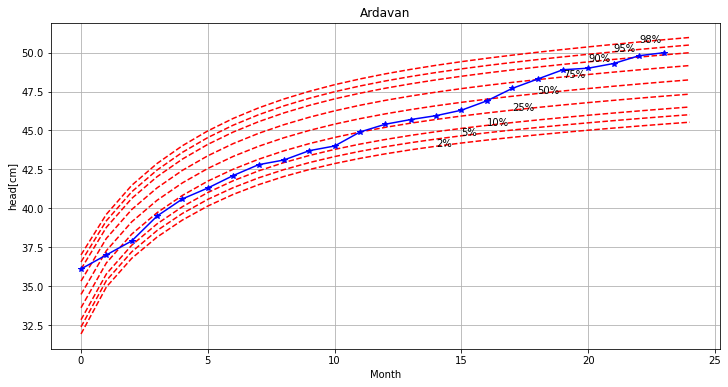

b_age_length


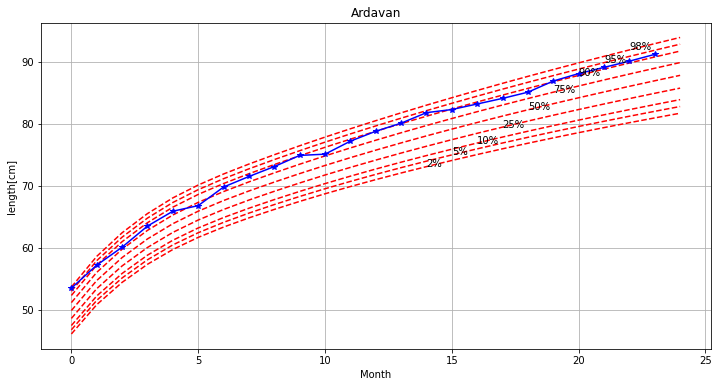

b_age_weight


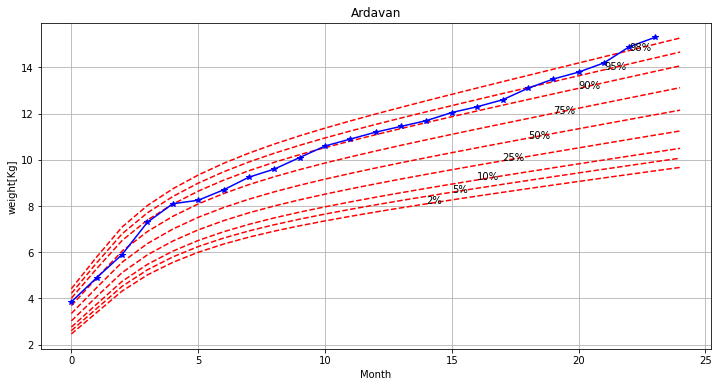

b_length_weight


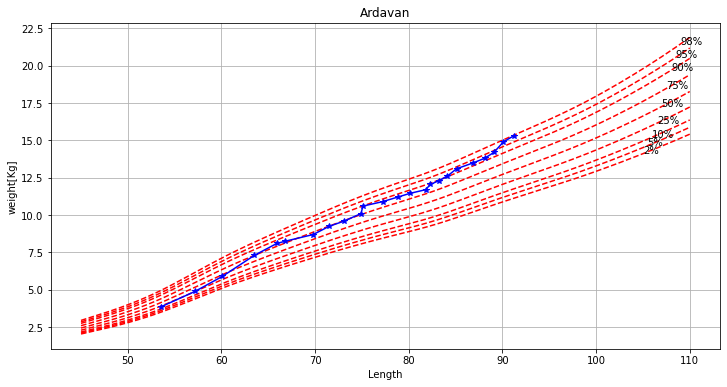

In [10]:
age = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
length= [53.5,57.2,60.1,63.5,65.9,66.8,69.8,71.5,73.1,74.9,75.1,77.2,78.8,80.1,81.8,82.3,83.2,84.1,85.1,86.9,88.1,89.1,90.1,91.2]
weight= [3.85,4.9,5.9,7.3,8.1,8.25,8.7,9.25,9.6,10.1,10.6,10.9,11.2,11.45,11.7,12.05,12.3,12.6,13.1,13.5,13.8,14.2,14.9,15.3]
head = [36.1,37.0,37.9,39.5,40.6,41.3,42.1,42.8,43.1,43.7,44.0,44.9,45.4,45.7,45.95,46.3,46.9,47.7,48.3,48.9,49.0,49.3,49.8,50.0]
draw_plots(data,files, name ='Ardavan', gender = 'boy',
           age =age, length=length,weight=weight,head=head,
           length_unit = 'cm', weight_unit = 'kg', head_unit = 'cm')

g_age_headc


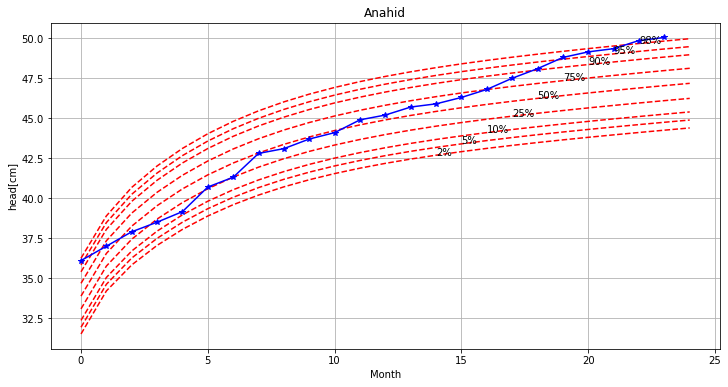

g_age_length


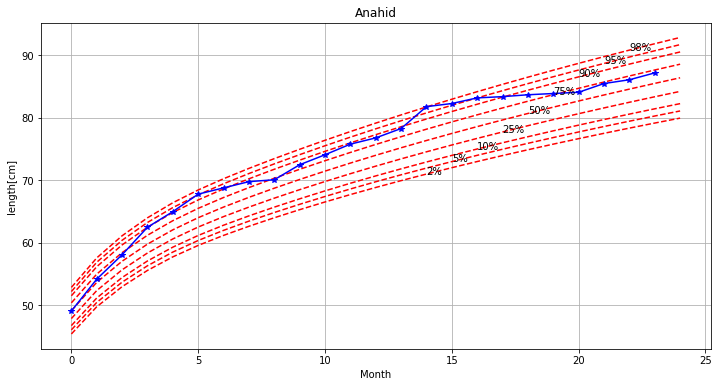

g_age_weight


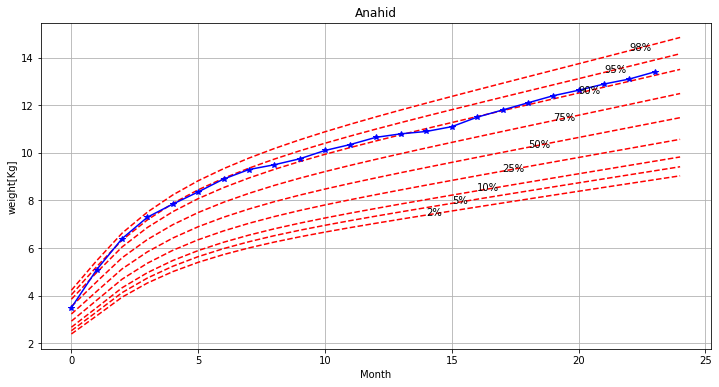

g_length_weight


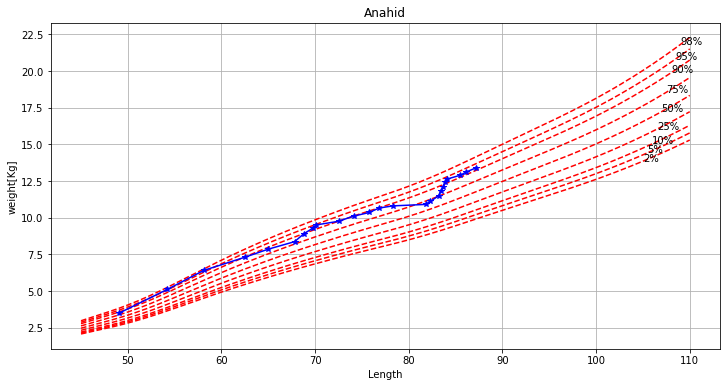

In [11]:
age = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
length= [49.1,54.2,58.1,62.5,65.0,67.8,68.8,69.8,70.1,72.5,74.1,75.8,76.8,78.3,81.8,82.3,83.2,83.4,83.7,83.9,84.1,85.5,86.1,87.2]
weight= [3.5,5.1,6.4,7.3,7.85,8.36,8.9,9.3,9.5,9.75,10.1,10.35,10.65,10.8,10.9,11.1,11.5,11.8,12.1,12.4,12.63,12.89,13.1,13.4]
head = [36.1,37.0,37.9,38.5,39.16,40.7,41.31,42.8,43.1,43.7,44.1,44.9,45.2,45.7,45.9,46.3,46.8,47.5,48.1,48.8,49.15,49.35,49.86,50.05]
draw_plots(data,files, name ='Anahid', gender = 'girl',
           age =age, length=length,weight=weight,head=head,
           length_unit = 'cm', weight_unit = 'kg', head_unit = 'cm')